### Quin Daly
### Math 438 HW 19.3

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from scipy import linalg

### Exercise 19.8

Setup the evolution equation for the Riccatti
equation (the linear 2D version)

In [13]:
def riccati(t,x,alpha,R,Q):
    dxdt = [alpha*x[0] + (.5)*(1/R)*x[1], 2*Q*x[0] - alpha*x[1]]
    return dxdt

Solve the Riccatti equation, and make sure to
save the output densely so we can interpolate later on

In [14]:
# Set up the parameters and weights
xf = [1,-2]#solve backward from tf=1
alpha = 3
R = 4
Q = 1
M = 1

# Solve
p_sol = solve_ivp(riccati,[1,0],xf,args=[alpha,R,Q],dense_output=True)

Assuming that we have an ODE solution to the Riccatti
equation then this is the evolution of the cancer cell population

In [15]:
def cancer_evolve(t,x,p_sol):
    X,Y = p_sol.sol(t)
    p = -.5*Y/X 
    return (2-p)*x

Solve the forward model for the cancer cells,
then compute the optimal control from the optimal state, 
and plot the results

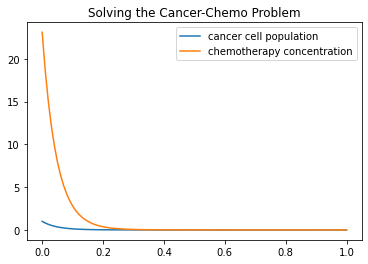

In [16]:
final_sol = solve_ivp(cancer_evolve,[0,1],[1],args=[p_sol], dense_output=True)
t = np.linspace(0,1,101) 
x = final_sol.sol(t) 
X,Y = p_sol.sol(t)
p = -.5*Y/X 
u = p*x 
plt.plot(t,np.squeeze(x))
plt.plot(t,np.squeeze(u))
plt.legend(['cancer cell population','chemotherapy concentration'])
plt.title('Solving the Cancer-Chemo Problem')
plt.show()


### Exercise 19.9

In [30]:
def car_driving_LQR(q0,q1,R,x0):
    #First set up all the relevant matrices
    A=np.array([[0,1],[0,0]])
    B=np.array([[0],[1]])
    Q=np.array([[q0,0],[0,q1]])
    R=R
    #solve the continuous algebraic Riccati equation
    P=linalg.solve_continuous_are(A,B,Q,R)

    #setup the evolution equation with optimal control selected
    def car_evolve(t,y):
        return (A-(1/R)*B@B.T@P)@y

    #solve the optimal state evolution, and plot the position & velocity
    sol = solve_ivp(car_evolve,[0,10],[-x0,0],dense_output=True)
    t = np.linspace(0,5,1001) 
    x,y = sol.sol(t)
    plt.plot(t,x)
    plt.plot(t,y)
    plt.legend(['Position','Velocity'])
    plt.title('Car Driving Problem')
    plt.show()
    

In [35]:
car_driving_LQR(3,2,1,5)

### Exercise 19.10

In [65]:
def glucose_insulin_LQR(alpha,a,b,c,x0):
    #First set up all the relevant matrices
    A=np.array([[-a,-b],[0,-c]])
    B=np.array([[0],[1]])
    Q=np.array([[alpha,0],[0,0]])
    R=1
    #solve the continuous algebraic Riccati equation
    P=linalg.solve_continuous_are(A,B,Q,R)

    #setup the evolution equation with optimal control selected
    def glucose_evolve(t,y):
        #return (-Q - A.T@P + P@A + P@B@B.T@P)@y
        return (A-(1/R)*B@B.T@P)@y

    #solve the optimal state evolution, and plot the insulin & glucose
    sol = solve_ivp(glucose_evolve,[0,10],[0,x0],dense_output=True)
    t = np.linspace(0,10,1001) 
    x,y = sol.sol(t)
    plt.plot(t,x)
    plt.plot(t,y)
    plt.legend(['Glucose','Insulin'])
    plt.title('Glucose-Insulin Problem')
    plt.show()

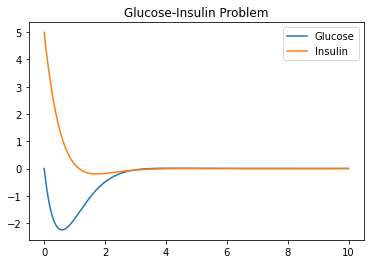

In [66]:
glucose_insulin_LQR(2,1,2,1.5,5)